In [1]:
import helper

In [2]:
tifs = helper.read_all_tifs(positive_strand_only=True, return_dict=True)

In [3]:
genome = helper.organize_genome_by_chrom(helper.read_bedfile(), positive_strand_only=True)

In [16]:
reads = helper.read_bamfile()
density_4, _ = helper.generate_read_density_chrom("chrII", reads)

INFO:helper:Reading bamfile...
INFO:helper:Done reading bamfile ../AitkenLab/rnaseq_all.bam
INFO:helper:generate_read_density_chrom chrom=chrII
INFO:helper:Processed mRNAs from chromosome chrII. Total reads in chromosome: 29259857. positive_strand_only=False
INFO:helper:len(reads)=29259857
INFO:helper:chrom_size=813000
INFO:helper:Done generating read density...
INFO:helper:Sum of density_n: 265804670
INFO:helper:Sum of density_p: 1031208269


In [6]:
from random_junctions import get_max_possible_genomic_regions, get_5utr_boundaries
import matplotlib.pyplot as plt
import numpy as np

INFO:helper:Reading bedfile...
INFO:helper:Done reading bedfile ../indexes/yeast-all.bed
INFO:helper:Processed TIFs in chromosome 1...
INFO:helper:Processed TIFs in chromosome 2...
INFO:helper:Processed TIFs in chromosome 3...
INFO:helper:Processed TIFs in chromosome 4...
INFO:helper:Processed TIFs in chromosome 5...
INFO:helper:Processed TIFs in chromosome 6...
INFO:helper:Processed TIFs in chromosome 7...
INFO:helper:Processed TIFs in chromosome 8...
INFO:helper:Processed TIFs in chromosome 9...
INFO:helper:Processed TIFs in chromosome 10...
INFO:helper:Processed TIFs in chromosome 11...
INFO:helper:Processed TIFs in chromosome 12...
INFO:helper:Processed TIFs in chromosome 13...
INFO:helper:Processed TIFs in chromosome 14...
INFO:helper:Processed TIFs in chromosome 15...
INFO:helper:Processed TIFs in chromosome 16...
INFO:helper:Done reading TIF file... returning a dictionary


In [7]:
gene_start, gene_end = get_max_possible_genomic_regions()

In [14]:
gene_end = {}
for chrom in helper.kYeastChroms:
    gene_end[chrom] = {}
    for gn, gene in genome[chrom].items():
        if gene.strand == "+":
            gene_end[chrom][gn] = gene.end

In [30]:
_, gene_end = get_5utr_boundaries()

In [27]:


genes_dict = {
    'chrII': ['YBL090W',
              'YBL068W',
              'YBR010W',
              'YBR106W',
              'YBR147W',
              'YBR168W',
              'YBR158W',
             'YBR199W'],
    'chrIII': [
               'YCL040W'],
    'chrVI': ['YDL051W',
                'YDL236W', 
                'YPL269W', 
                'YPR145W', 
                'YPR149W',
                'YPR198W']}

In [23]:
densities = {}
for chrom, genes in genes_dict.items():
    densities[chrom], _ = helper.generate_read_density_chrom(chrom, reads)

INFO:helper:generate_read_density_chrom chrom=chrII
INFO:helper:Processed mRNAs from chromosome chrII. Total reads in chromosome: 29259857. positive_strand_only=False
INFO:helper:len(reads)=29259857
INFO:helper:chrom_size=813000
INFO:helper:Done generating read density...
INFO:helper:Sum of density_n: 265804670
INFO:helper:Sum of density_p: 1031208269
INFO:helper:generate_read_density_chrom chrom=chrIII
INFO:helper:Processed mRNAs from chromosome chrIII. Total reads in chromosome: 14662874. positive_strand_only=False
INFO:helper:len(reads)=14662874
INFO:helper:chrom_size=316080
INFO:helper:Done generating read density...
INFO:helper:Sum of density_n: 525833477
INFO:helper:Sum of density_p: 127153509
INFO:helper:generate_read_density_chrom chrom=chrIV
INFO:helper:Processed mRNAs from chromosome chrIV. Total reads in chromosome: 48909926. positive_strand_only=False
INFO:helper:len(reads)=48909926
INFO:helper:chrom_size=1531837
INFO:helper:Done generating read density...
INFO:helper:Sum o

YBL090W


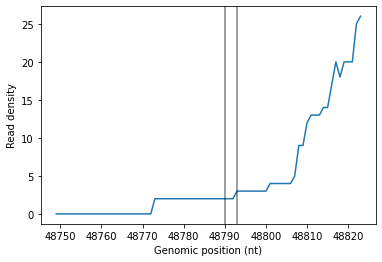

YBL068W


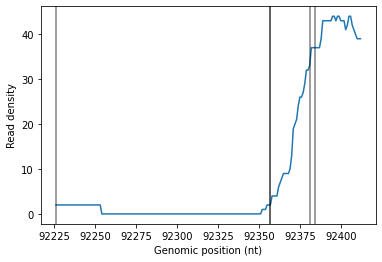

YBR010W


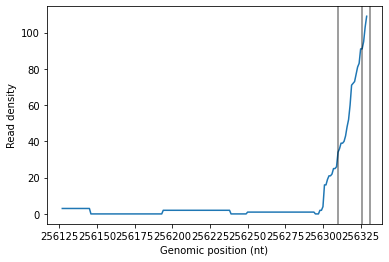

YBR106W


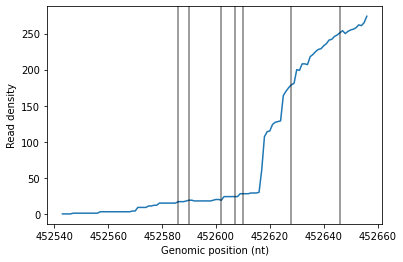

YBR147W


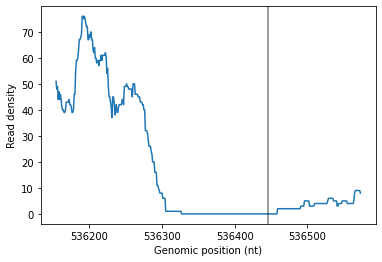

YBR168W


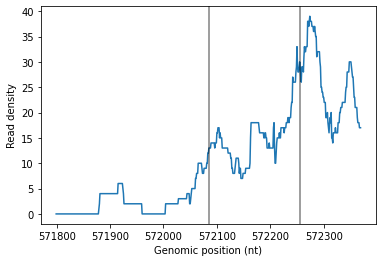

YBR158W


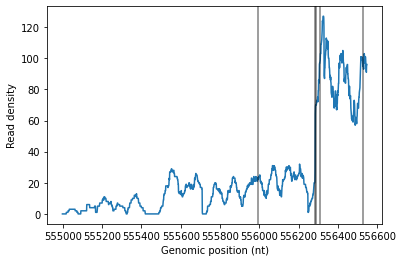

YBR199W


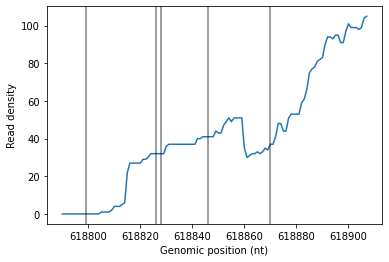

YCL040W


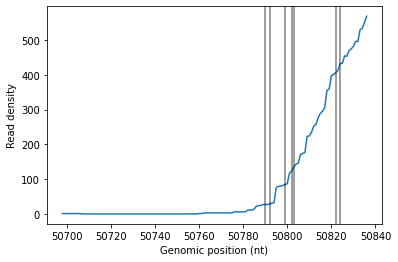

KeyError: 'chrVI'

In [32]:
for chrom, genes in genes_dict.items():
    density=densities[chrom]
    for gn in genes:
        gene = genome[chrom][gn]
        print(gn)
        plt.plot(range(gene_start[chrom][gn], gene_end[chrom][gn]),
                         density[gene_start[chrom][gn]:gene_end[chrom][gn]])        
        junctions = np.unique(sorted(tifs[chrom][gn]['t5'].tolist())) 
        junctions = np.random.choice(junctions, int(len(junctions) / 10))
        for j in junctions:
            plt.axvline(j, color='k', alpha=0.5)

        plt.xlabel("Genomic position (nt)")
        plt.ylabel("Read density")
        plt.show()
        plt.close()

YBL102W


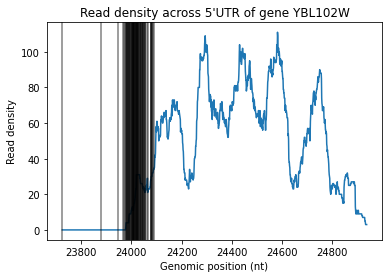

YBL100W-C


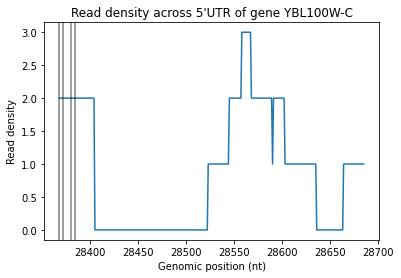

YBL099W


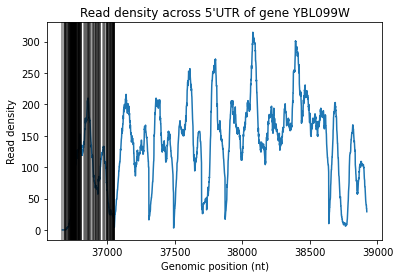

YBL097W


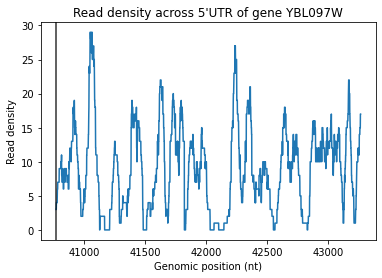

YBL095W


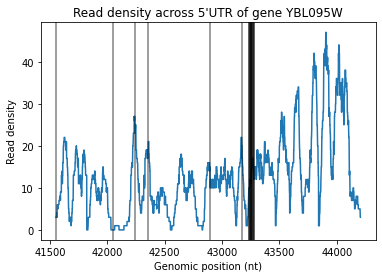

YBL092W


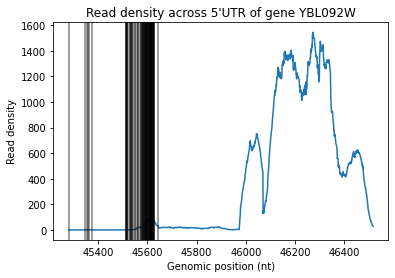

YBL090W


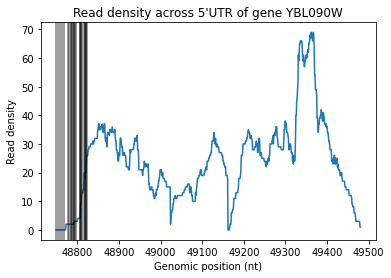

YBL089W


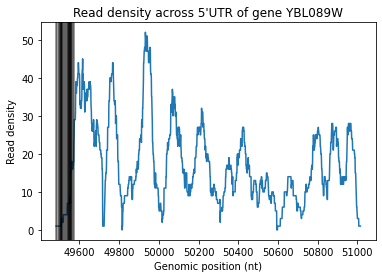

YBL085W


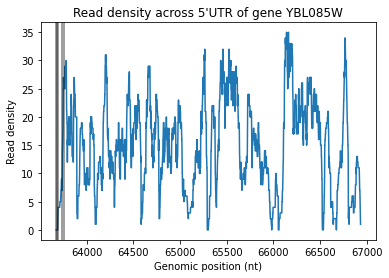

YBL081W


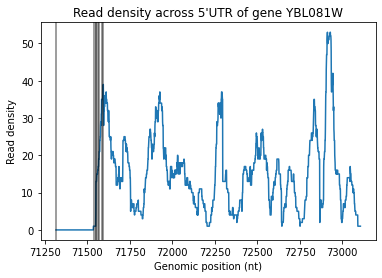

YBL079W


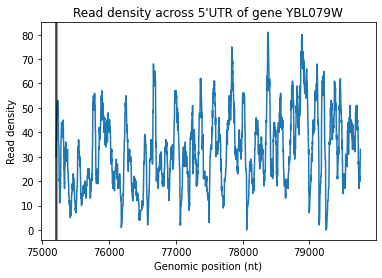

YBL071W-A


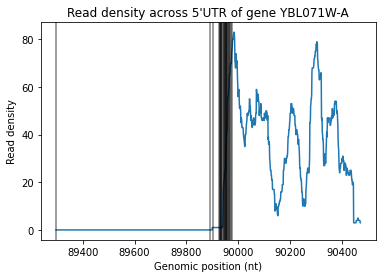

YBL068W


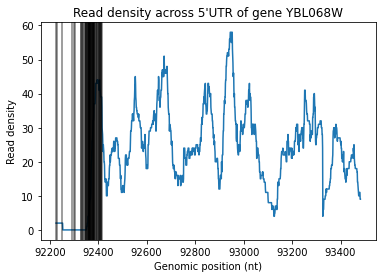

YBL063W


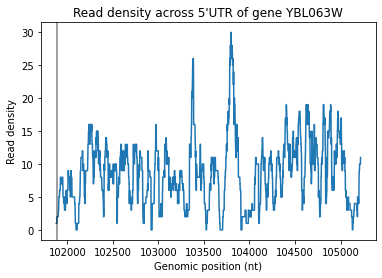

YBL060W


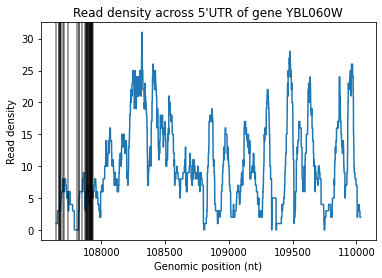

YBL058W


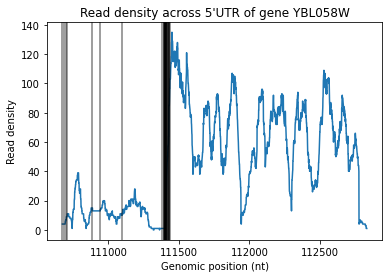

YBL056W


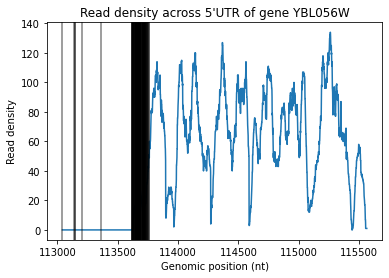

YBL054W


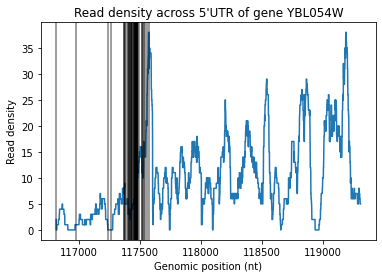

YBL050W


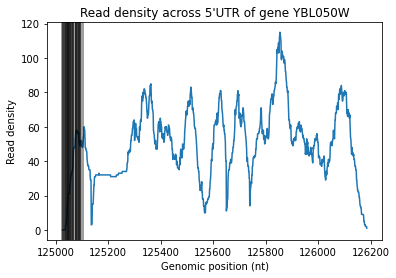

YBL046W


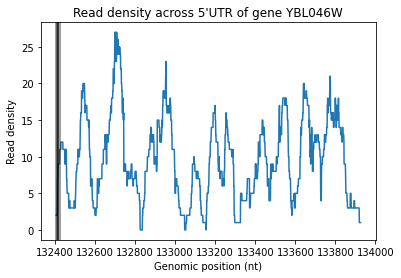

YBL043W


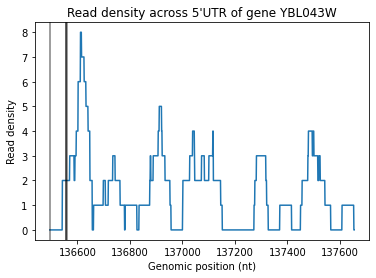

YBL041W


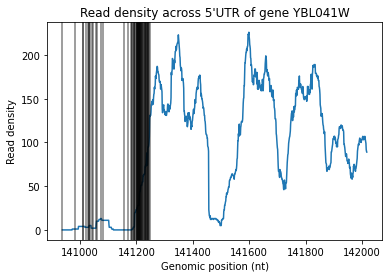

YBL039W-B


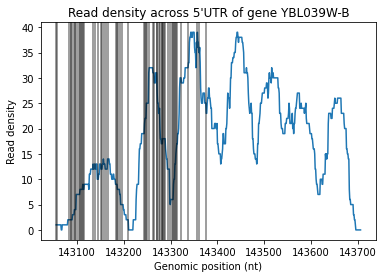

YBL038W


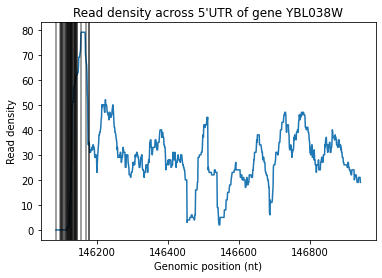

YBL037W


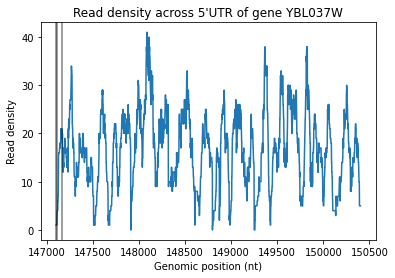

YBL032W


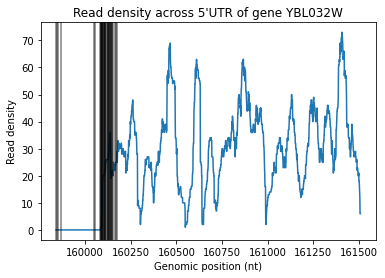

YBL031W


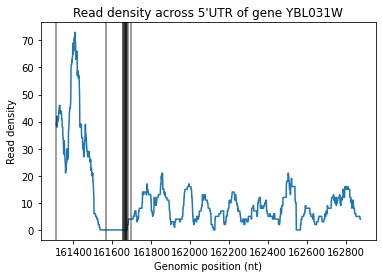

YBL027W


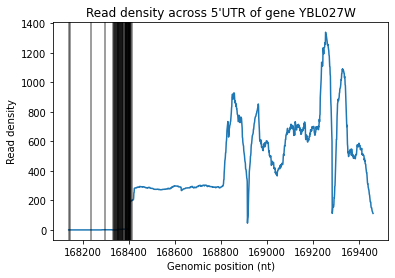

YBL026W


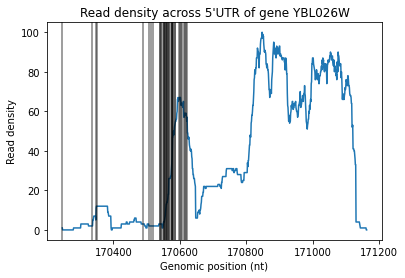

YBL025W


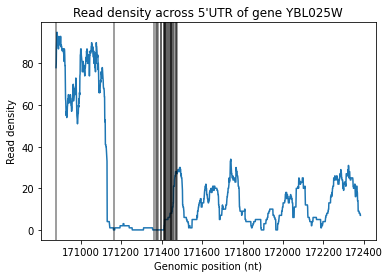

YBL024W


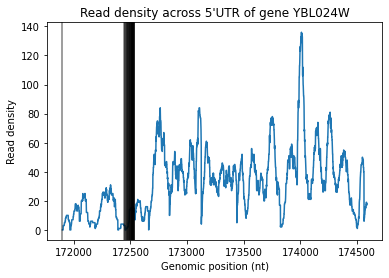

YBL020W


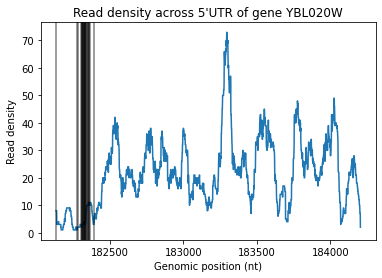

YBL019W


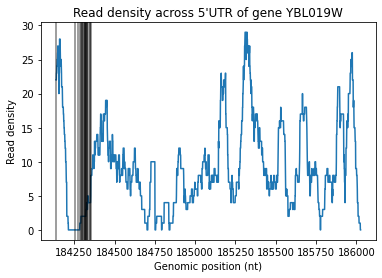

YBL016W


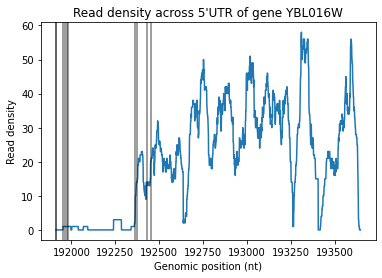

YBL015W


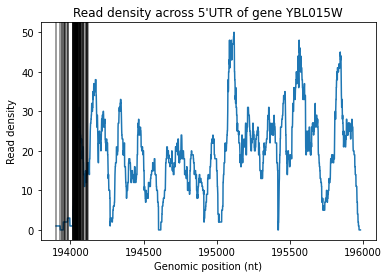

YBL011W


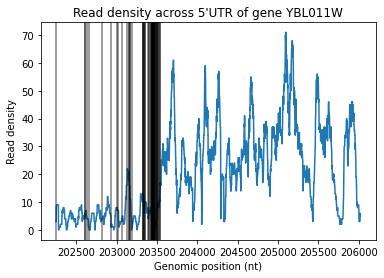

YBL009W


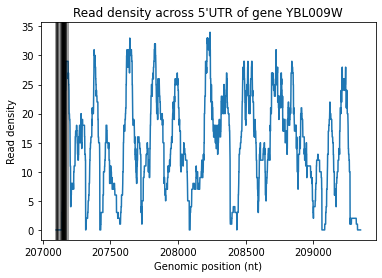

YBL008W


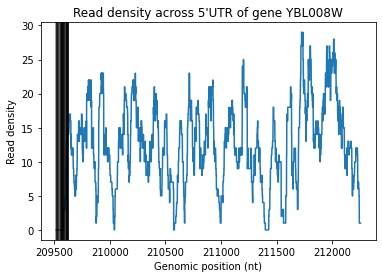

YBL005W


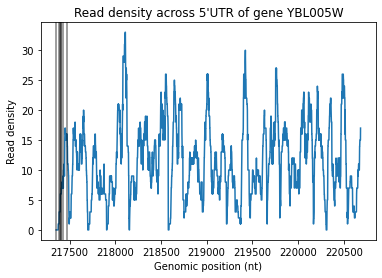

YBL002W


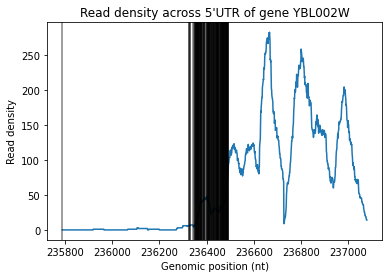

YBR003W


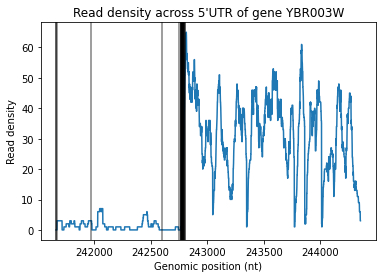

YBR005W


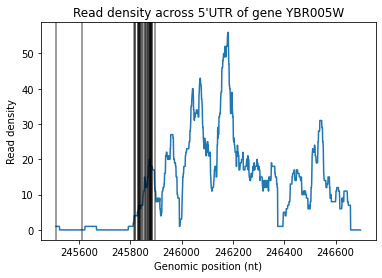

YBR006W


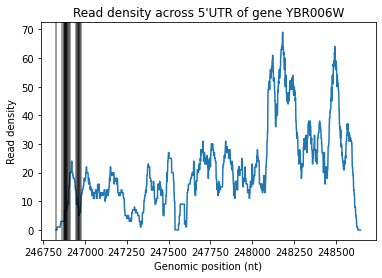

YBR010W


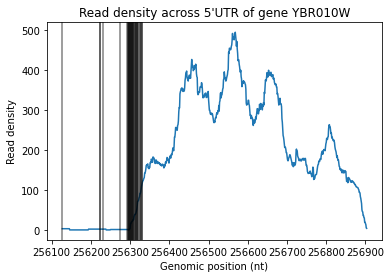

YBR016W


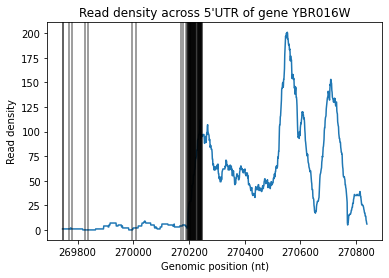

YBR020W


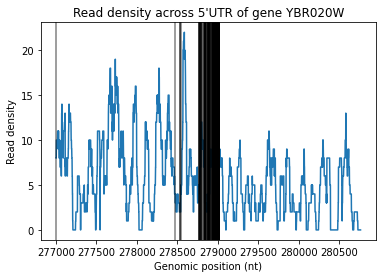

YBR021W


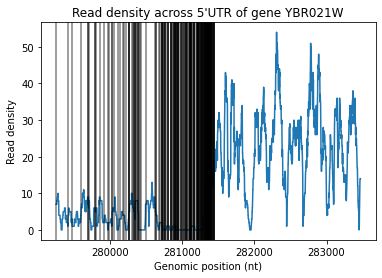

YBR022W


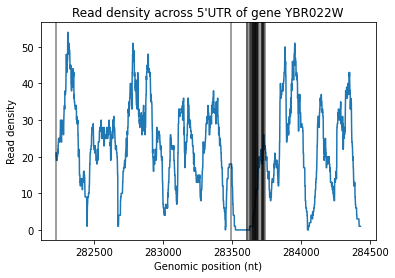

YBR024W


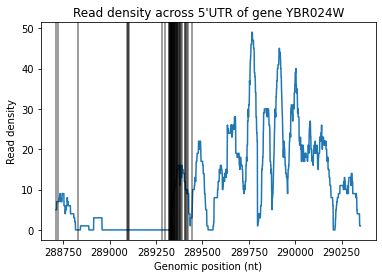

YBR030W


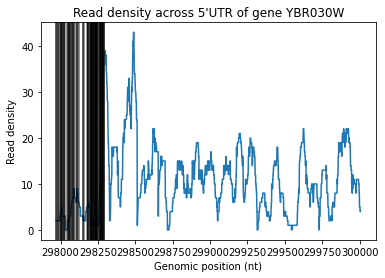

YBR031W


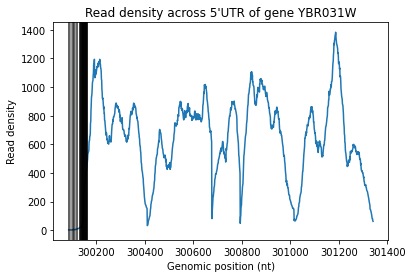

YBR033W


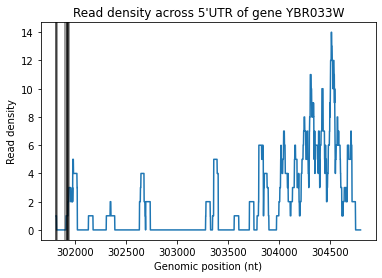

YBR038W


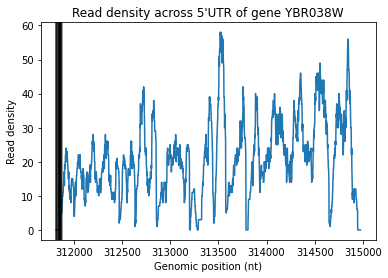

YBR039W


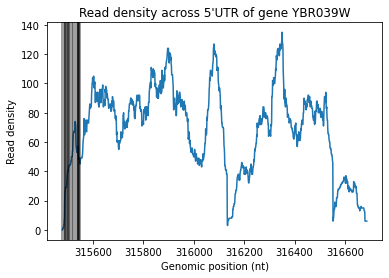

YBR041W


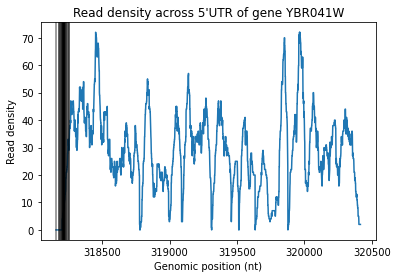

YBR047W


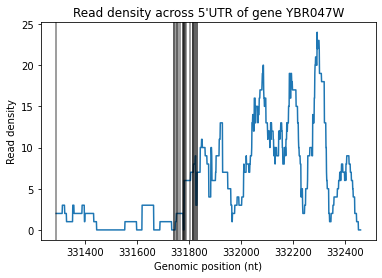

YBR048W


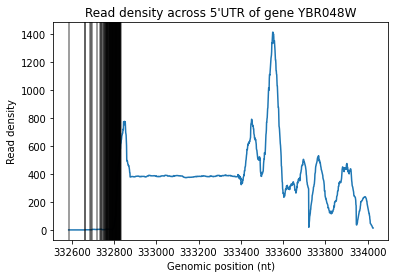

YBR054W


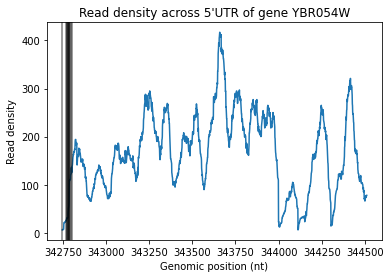

YBR056W


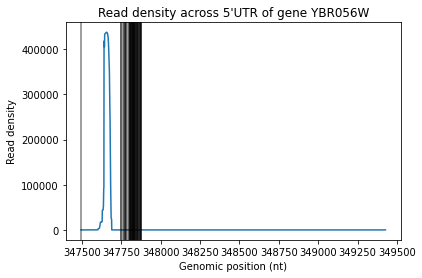

YBR056W-A


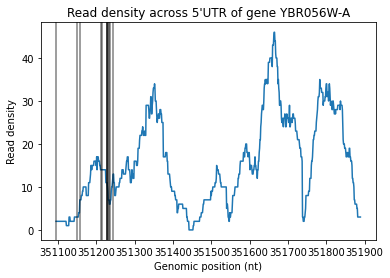

YBR071W


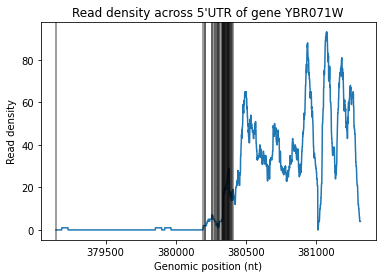

YBR072W


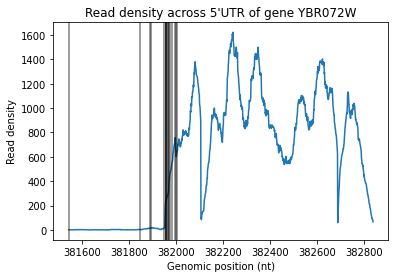

YBR073W


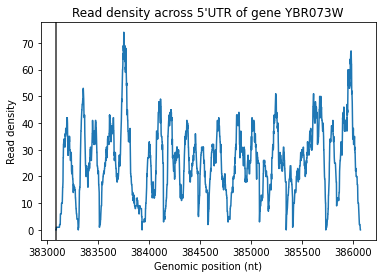

YBR074W


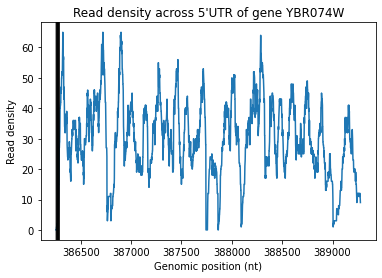

YBR076W


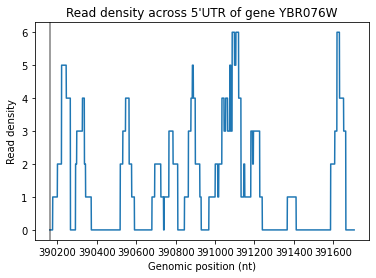

YBR078W


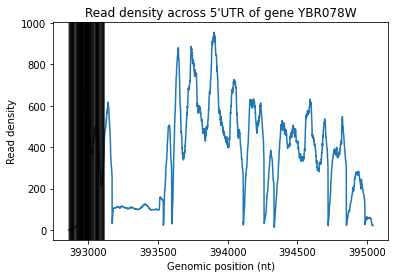

YBR083W


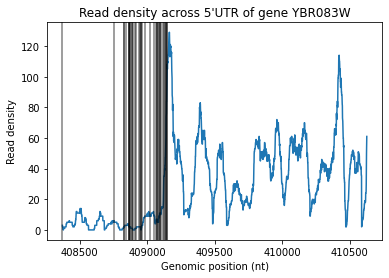

YBR084W


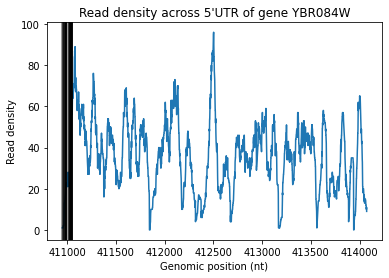

YBR085W


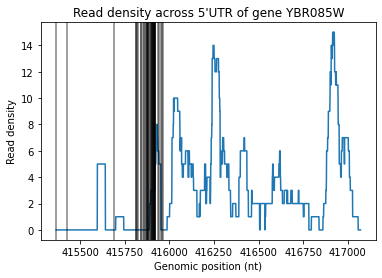

YBR087W


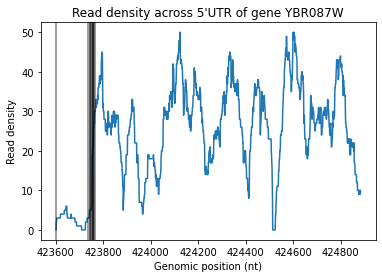

YBR094W


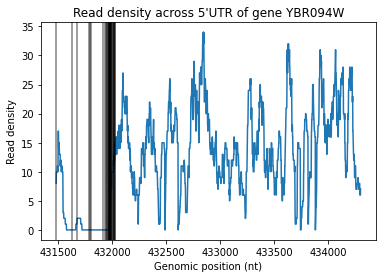

YBR096W


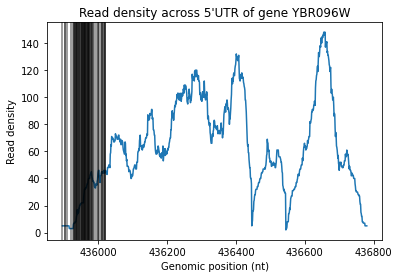

YBR097W


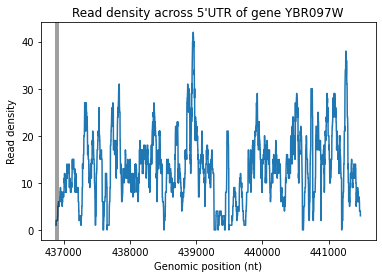

YBR098W


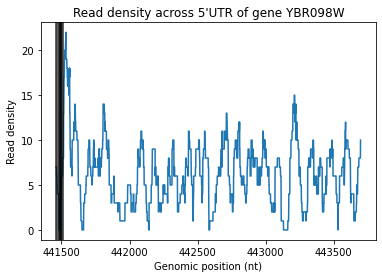

YBR103W


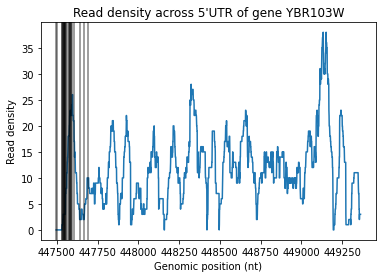

YBR104W


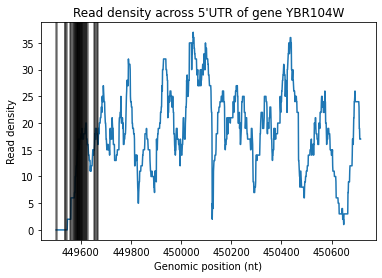

YBR106W


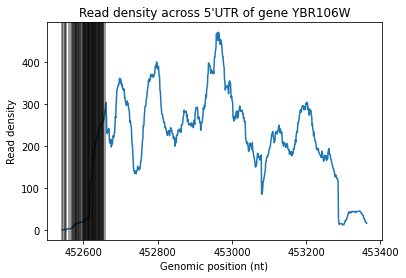

YBR108W


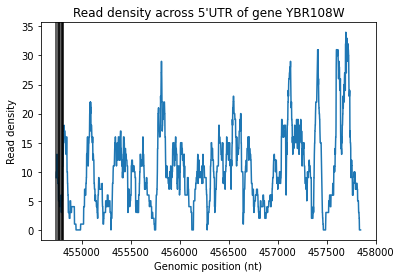

YBR110W


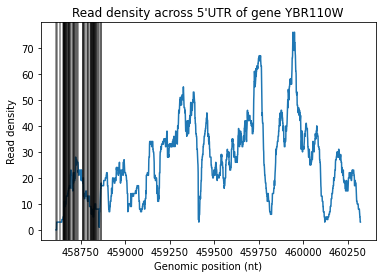

YBR111W-A


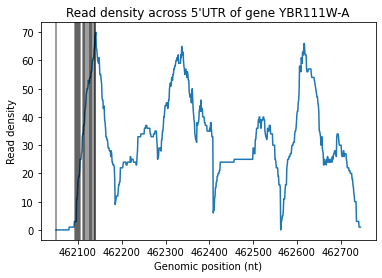

YBR114W


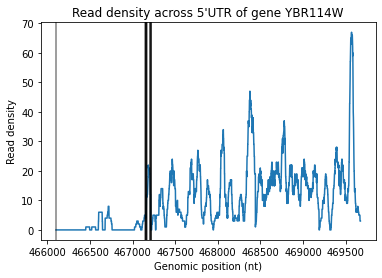

YBR118W


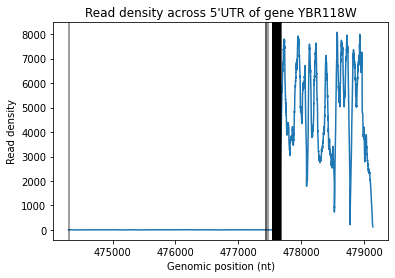

YBR119W


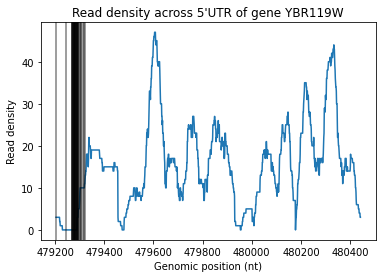

YBR131W


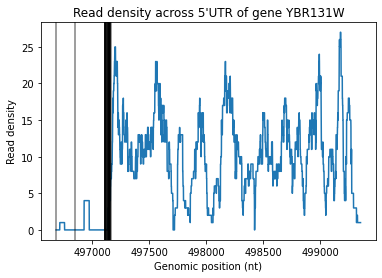

YBR135W


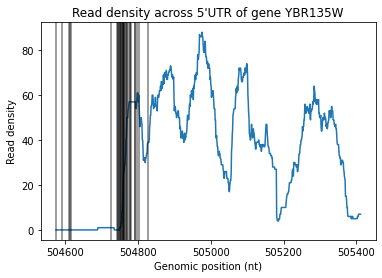

YBR137W


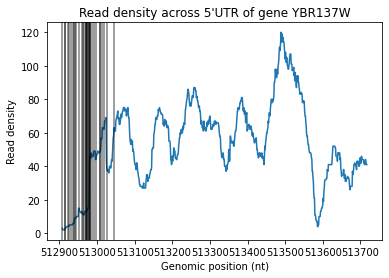

YBR139W


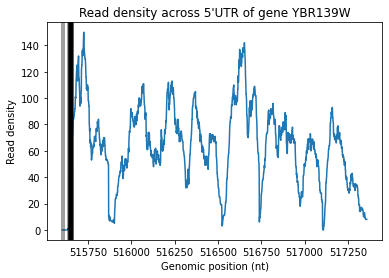

YBR141W-A


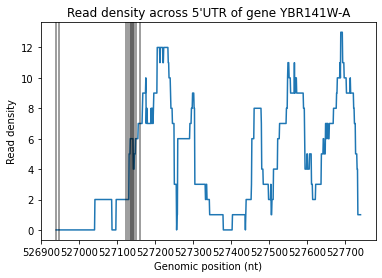

YBR142W


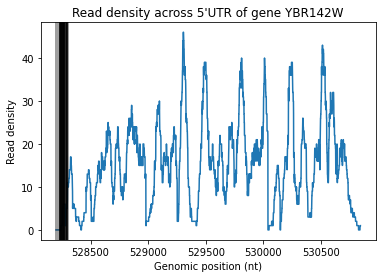

YBR145W


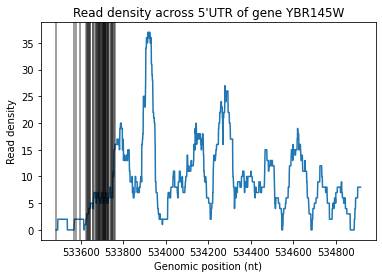

YBR146W


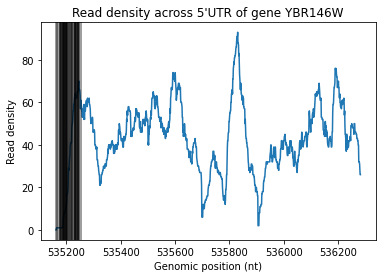

YBR147W


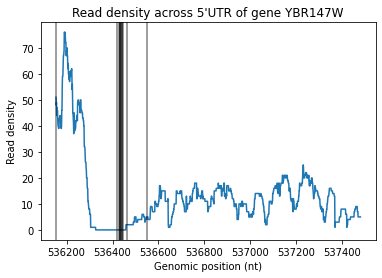

YBR148W


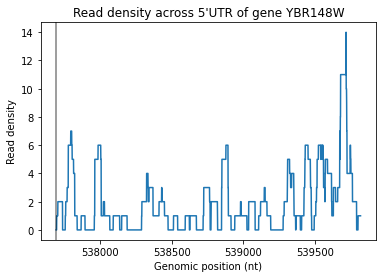

YBR149W


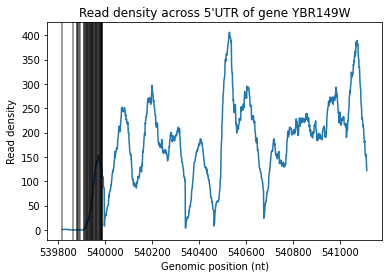

YBR151W


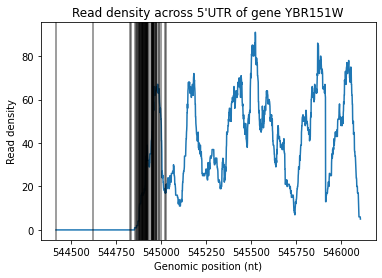

YBR152W


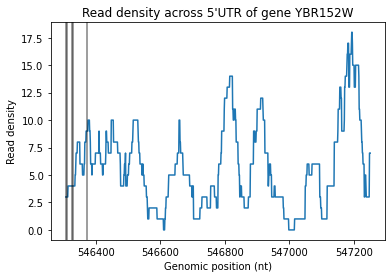

YBR153W


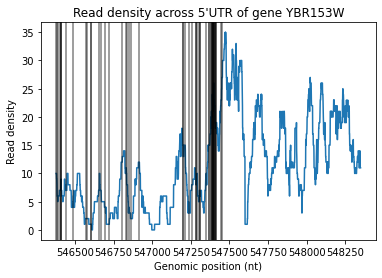

YBR155W


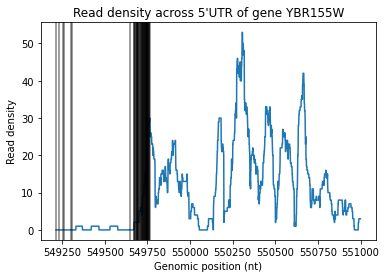

YBR158W


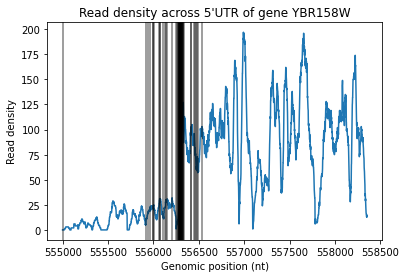

YBR159W


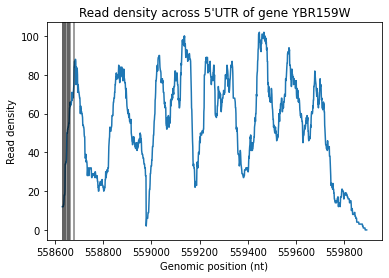

YBR160W


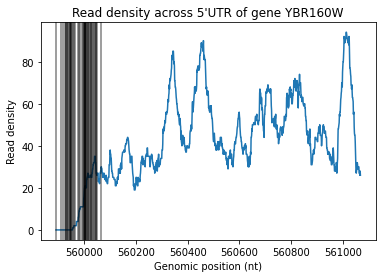

YBR161W


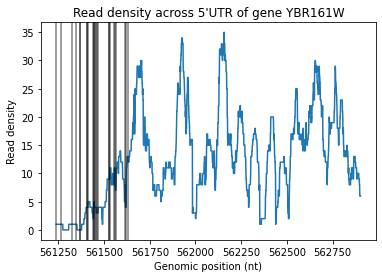

YBR162W-A


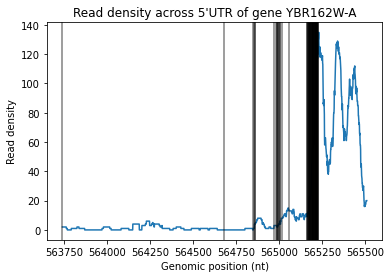

YBR163W


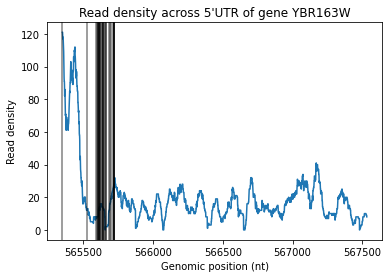

YBR165W


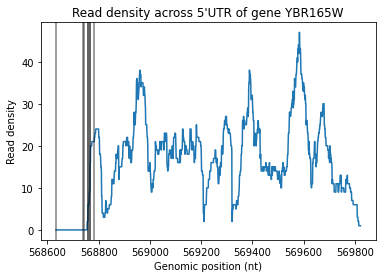

YBR168W


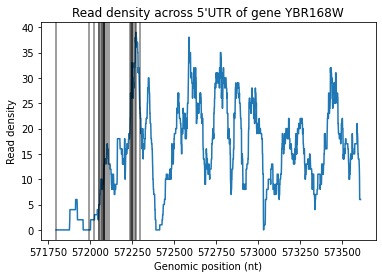

YBR171W


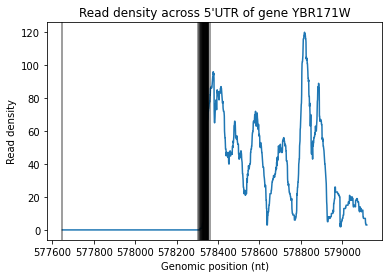

YBR175W


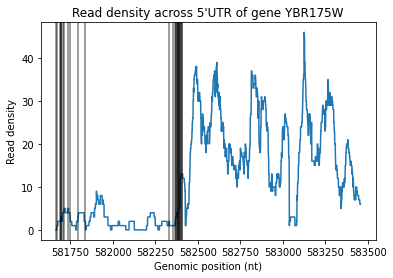

YBR176W


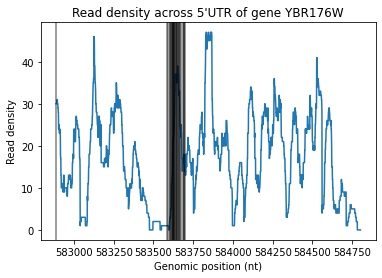

YBR178W


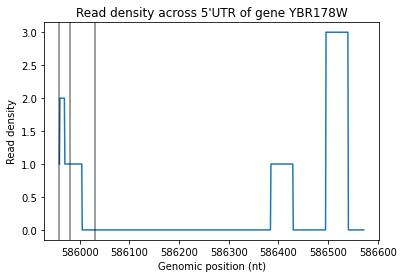

YBR183W


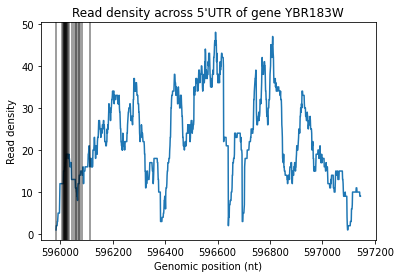

YBR184W


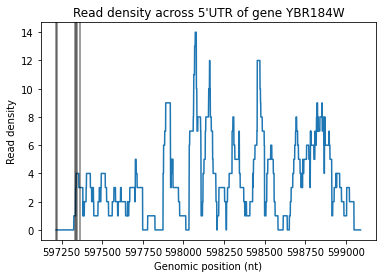

YBR186W


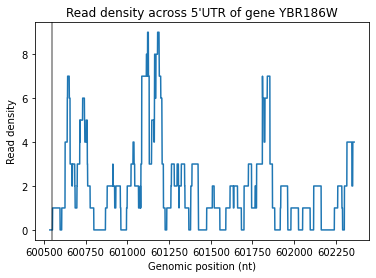

YBR187W


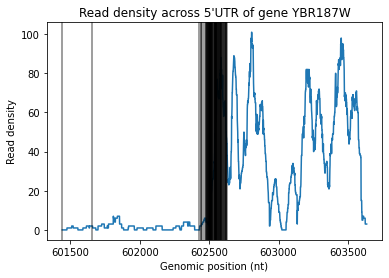

YBR189W


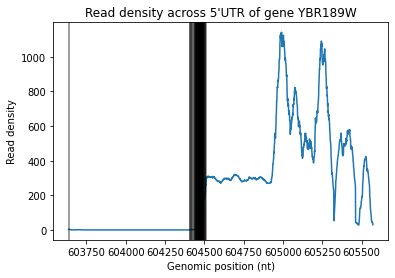

YBR192W


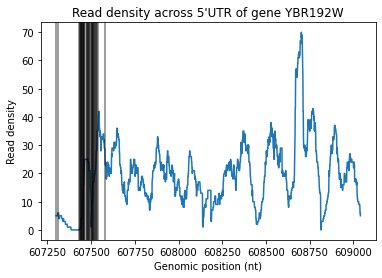

YBR194W


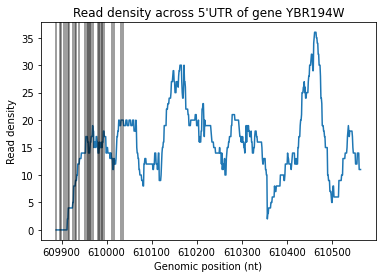

YBR199W


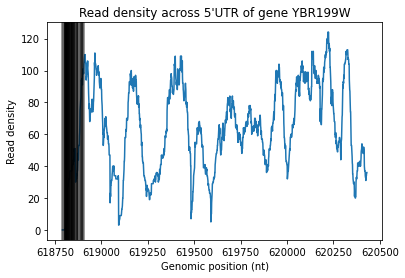

YBR200W


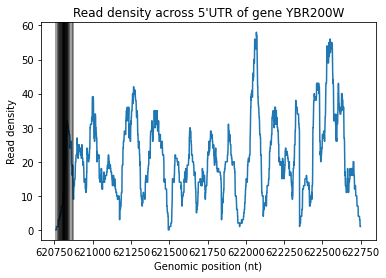

YBR201W


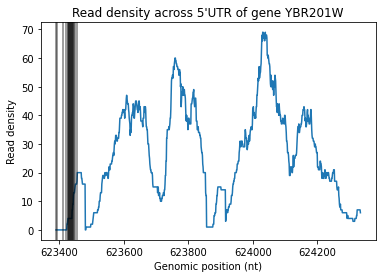

YBR202W


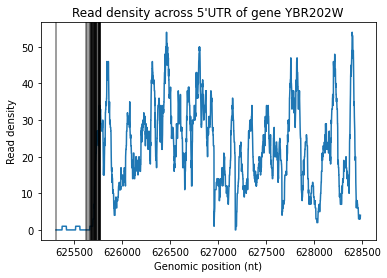

YBR203W


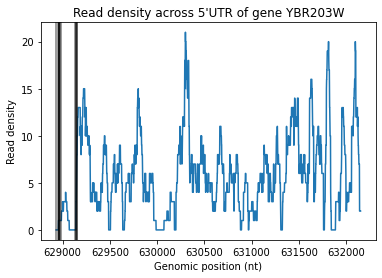

YBR205W


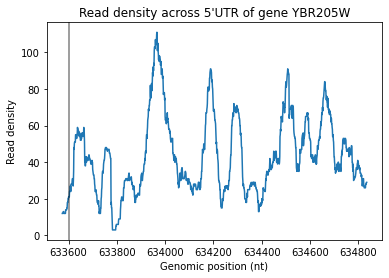

YBR207W


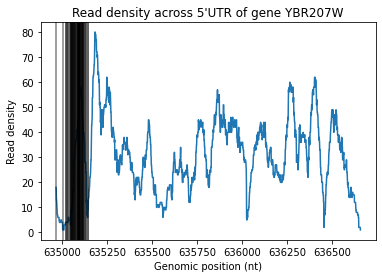

YBR210W


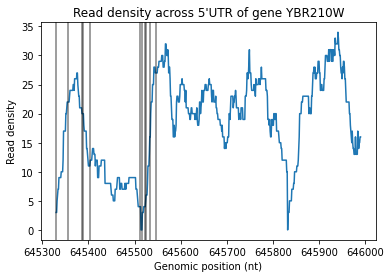

YBR212W


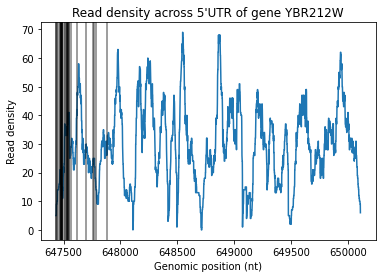

YBR213W


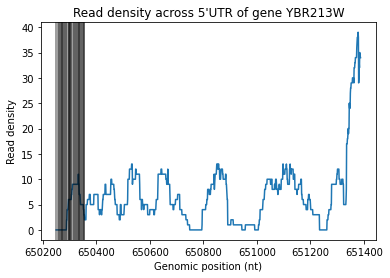

YBR214W


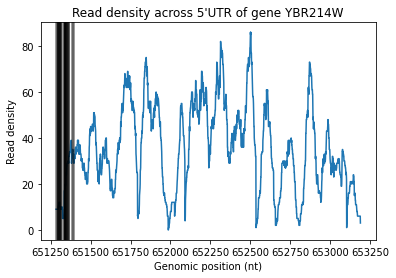

YBR215W


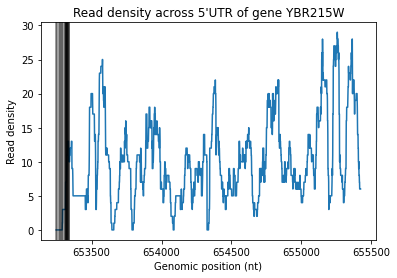

YBR217W


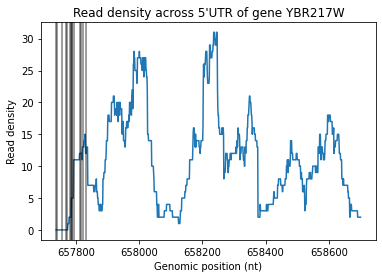

YBR225W


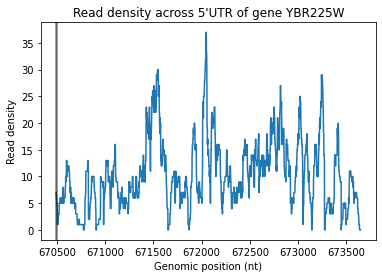

YBR228W


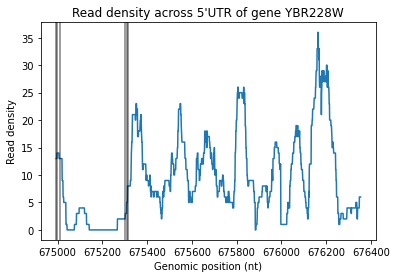

YBR230W-A


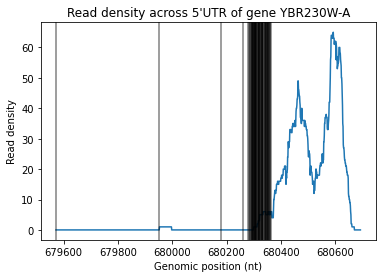

YBR233W


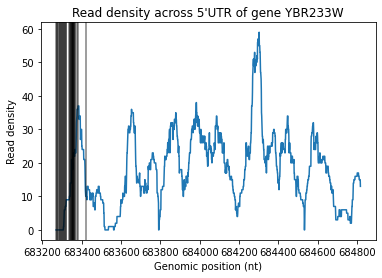

YBR233W-A


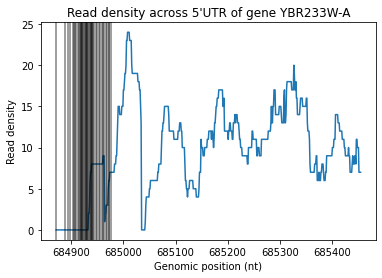

YBR235W


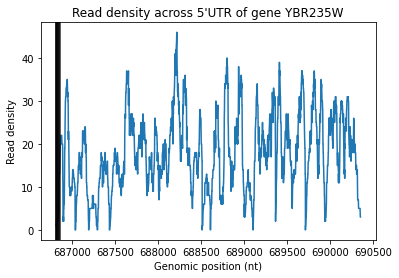

YBR237W


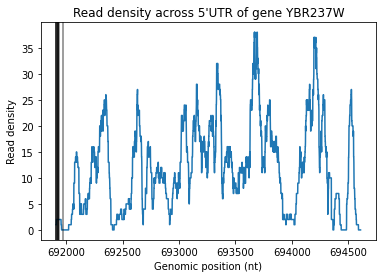

YBR242W


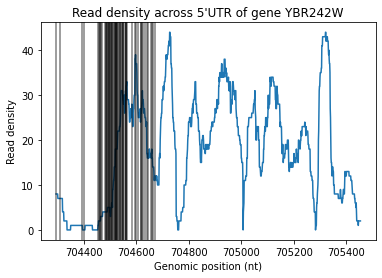

YBR244W


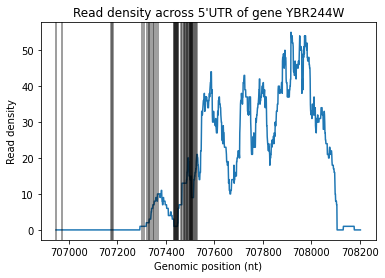

YBR246W


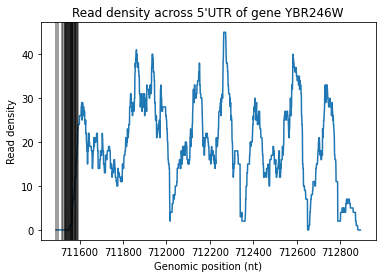

YBR250W


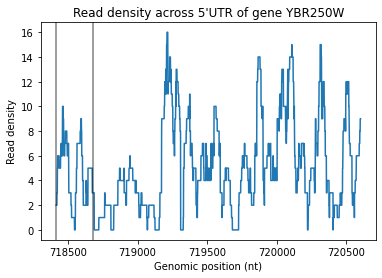

YBR251W


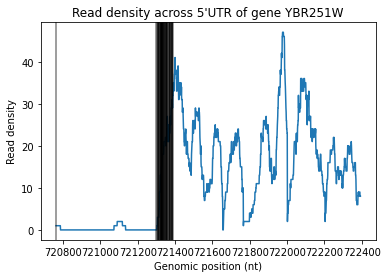

YBR252W


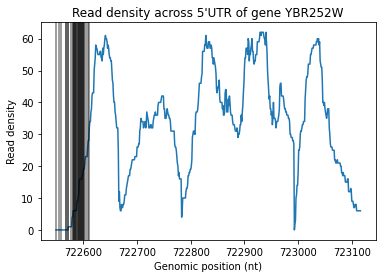

YBR253W


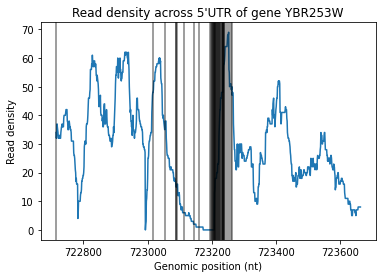

YBR255W


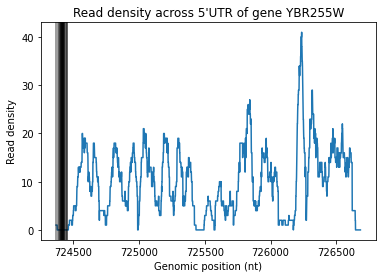

YBR257W


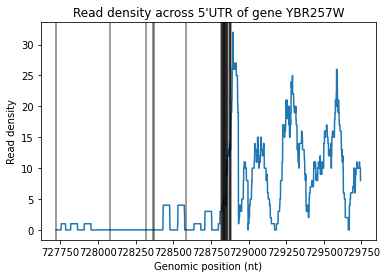

YBR259W


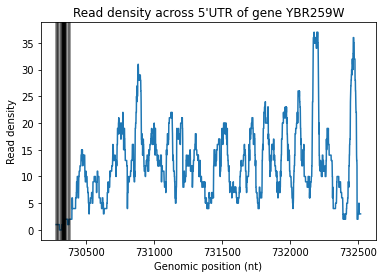

YBR263W


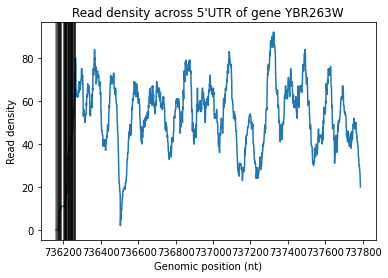

YBR265W


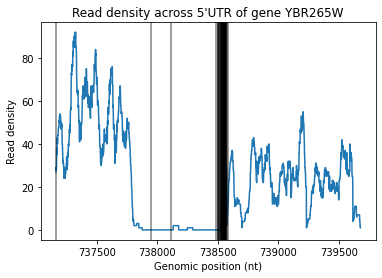

YBR267W


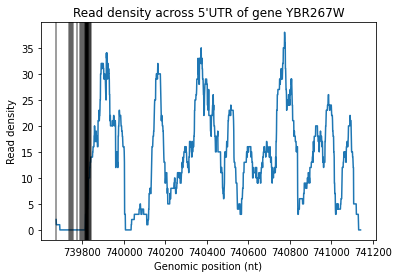

YBR268W


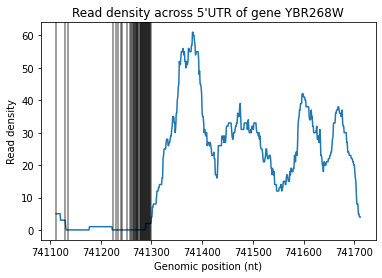

YBR271W


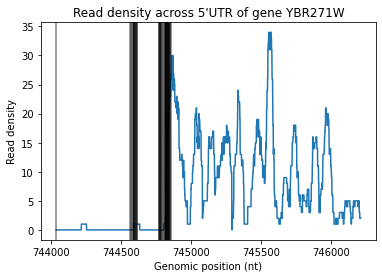

YBR274W


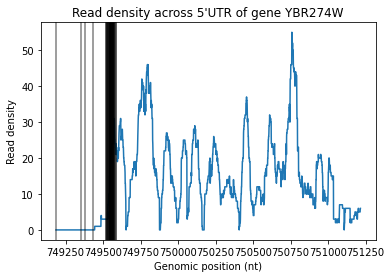

YBR278W


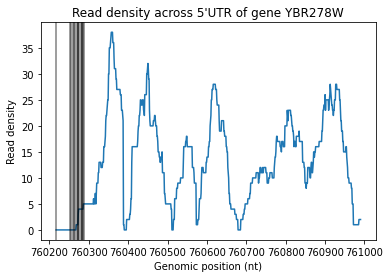

YBR279W


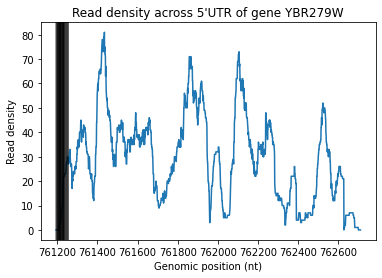

YBR282W


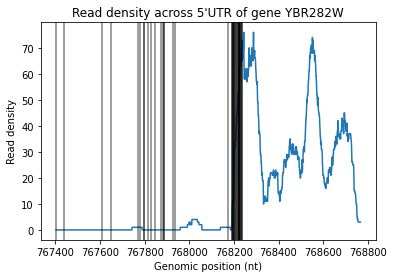

YBR284W


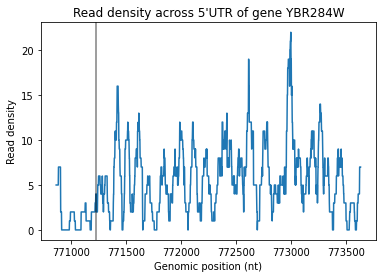

YBR285W


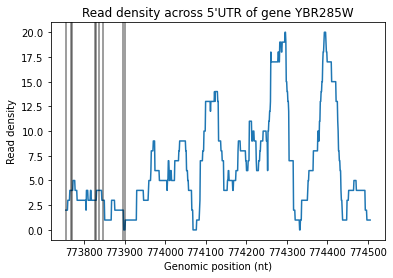

YBR286W


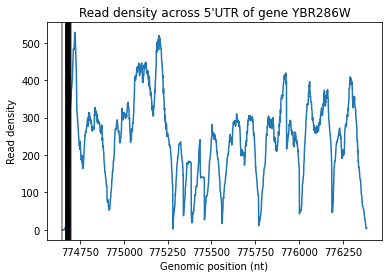

YBR287W


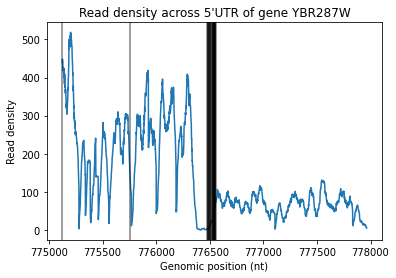

YBR289W


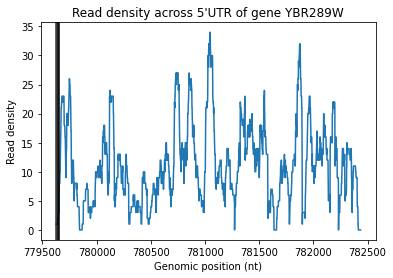

YBR290W


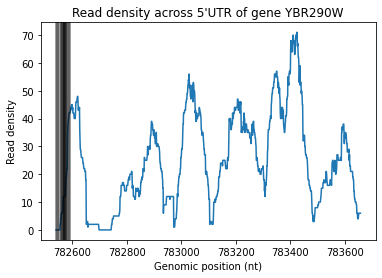

YBR293W


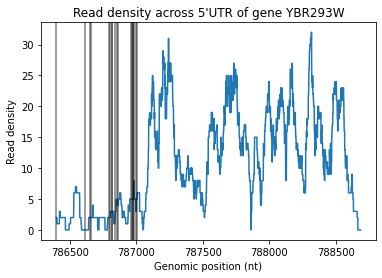

YBR295W


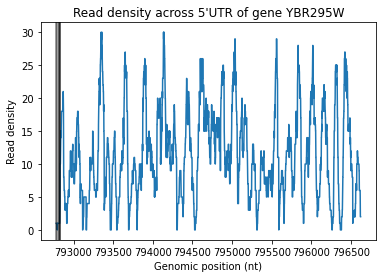

YBR297W


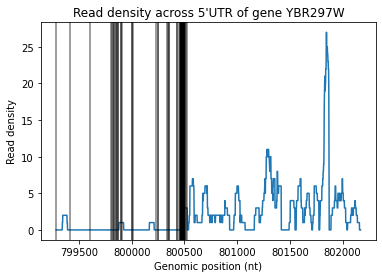

YBR299W


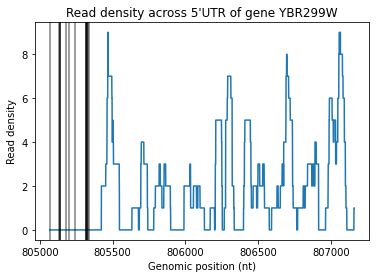

In [18]:
chrom = "chrII"
for gn, gene in genome[chrom].items():
    if gene.strand == "+" and gn in tifs[chrom] and gn in gene_start[
            chrom] and gn in gene_end[chrom]:
        print(gn)
        plt.plot(range(gene_start[chrom][gn], gene_end[chrom][gn]),
                 density_4[gene_start[chrom][gn]:gene_end[chrom][gn]])
        junctions = np.unique(sorted(tifs[chrom][gn]['t5'].tolist()))           
        for j in junctions:
            plt.axvline(j, color='k', alpha=0.5)

        plt.xlabel("Genomic position (nt)")
        plt.ylabel("Read density")

        plt.title("Read density across 5'UTR of gene " + gn)
        plt.show()
        plt.close()
        